# 3) Additional Comparative Study
Thanks to the good results obtained in the comparative study, the company has deployed your
system and is obtaining good profit. Now a competitor would like to hire you to design a similar
system for them but, unlike the first system, they would like you to predict not only if the insured
files a claim but also the value of the claim.
They provide you with a training set of historical data containing features of each customer
and a numerical value representing the value of the claim (which may be zero). These data are
available in the TravelInsurance_Regression.zip archive. In this part of
the project, you are asked to perform the following two tasks.

a) Investigate the performance of a number of machine learning procedures on this
dataset. Using the data in the file TravelInsurance_Regr.csv contained in the TravelInsurance_Regression.zip
archive, you are required to perform a comparative study of the following machine learning procedures:
- Linear Regression;
- at least two more ML technique to predict the value of the claim.
This company too uses Python internally and therefore Python with scikit-learn is the required
language and machine learning library for the problem. For this task, you are expected to submit a
Jupyter Notebook called TravelInsuranceRegression.ipynb containing the Python code used to perform
the comparative analysis and produce the results as well as the code used to perform the predictions
described in task “b” below.

b) Prediction on a hold-out test set. An additional dataset, TravelInsuranceRegr_Test.csv, is provided
inside the TravelInsurance_Regression.zip archive. Target values are withheld for this test set (i.e. the “Value”
column is empty). In this second task you are required to produce predictions of the records in
the test set using one approach of your choice among those tested in task “a” (for example the one
achieving the best performance). These data must not be used other than to test the algorithm
trained on the training data.

As part of your submission you should submit a new version of the file TravelInsurance_Regr.csv in
CSV format with the missing “Value” column replaced with the output predictions obtained using
the approach chosen. This second task will be marked based on the mean squared error on the test
set

# Multiple Linear Regression
We will use three regression techniques to solve this problem: multiple linear regression, polynomial regression, and bayesian regression. Remember that in this task we are predicting the value of claim filed by the customer.

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Load the travel insurance dataset

In [153]:
data=pd.read_csv("TravelInsurance_Regression\TravelInsurance_Regr.csv")
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56


### One-hot encoding
Get dummies is also referred to as one-hot encoding, this is a special feature for our categorical variable.

In [154]:
dummies=pd.get_dummies(data)
dummies

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,Target,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,3616.82,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,3342.88,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,0.00,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,1742.65,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,373.56,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,-224.04,539.91,8.23,-232.93,2,3,12.32,...,1515.56,0,1,0,0,0,0,0,1,0
1496,12.10,2.98,-144.42,-76.05,736.65,0.48,90.41,3,6,7.40,...,1528.48,0,0,1,0,0,0,1,0,0
1497,4.12,4.36,-160.30,-230.43,439.86,0.69,-224.44,3,3,7.02,...,323.67,1,0,0,0,0,0,1,0,0
1498,1.58,13.50,-159.60,-233.85,572.58,0.29,-126.79,1,5,1.68,...,109.19,0,0,0,1,0,0,0,1,0


### Pass all columns except 'Target' to the variable X.

In [155]:
X=dummies.drop(['Target'], axis=1)
X.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,1734.58,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,1672.70,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,1462.86,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,809.46,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,1435.90,0,0,0,1,0,0,0,0,1


### Use the variable y to store the 'Target' value, also known as the target variable that we will be predicting.

In [156]:
y=dummies[['Target']]
y.head()

,Target
0,3616.82
1,3342.88
2,0.00
3,1742.65
4,373.56


### Standardize the dataset

In [157]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.46506133,  0.74184759, -0.84167291,  1.42963378,  0.02896546,
        -0.07631873,  0.88572439, -1.60522276, -1.62629253,  0.13321652,
         0.083995  , -0.3085672 , -0.29732389,  0.41245642, -0.55476064,
         1.63875065, -0.58248237, -0.56195149,  1.99584286, -0.51039612,
        -0.48641902, -0.48956044, -0.51247074],
       [ 0.62854316,  0.74873119, -0.07109323,  1.88087389, -0.25876303,
        -0.08212054,  0.96414008,  0.57331978, -0.52097364, -1.27842626,
        -0.07283524,  0.17435807,  0.00637692,  0.30977495, -0.55476064,
         1.63875065, -0.58248237, -0.56195149, -0.50104145, -0.51039612,
        -0.48641902, -0.48956044,  1.95133091],
       [-0.64697421, -0.92398299, -0.25770753, -0.04491785,  0.29916974,
        -0.08060871,  0.10227606,  0.02868414,  0.03168581,  0.29445311,
         1.11063111,  0.0519729 ,  0.52529877, -0.03842608, -0.55476064,
        -0.61022096,  1.71679015, -0.56195149, -0.50104145,  1.95926253,
        -0.48641902, -0.4895

### Train Test Split divides the dataset into 70 percent for training and 30 percent for testing.

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### To build the model, import Linear Regression from the sci-kit learn library

In [159]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression().fit(x_train,y_train)
print ('Coefficients: ', ml.coef_)
print ('Intercept: ', ml.intercept_)

Coefficients:  [[ 3.69483752e+02  4.06691276e+02  5.06400227e+00  4.31564623e+02
  -3.85550433e+00  6.75865168e+00 -2.97562566e+02  2.31585442e+02
  -2.40121692e+02  9.55895711e+00 -1.52922932e+01 -8.31642238e+00
  -7.32681649e+00 -2.44240643e+02  9.17386589e+15  9.61591489e+15
   9.40554867e+15  9.23606544e+15  7.58649846e+13  7.67013242e+13
   7.45109127e+13  7.48066521e+13  7.68836604e+13]]
Intercept:  [926.3877295]


### Let us now apply the predict to our test set.

In [160]:
y_pred=ml.predict(x_test)
print(y_pred)

[[ 1.53954398e+03]
 [ 2.03354398e+03]
 [ 2.27307523e+03]
 [ 2.25554398e+03]
 [-6.00143520e+02]
 [ 1.00785648e+03]
 [ 6.95439795e+01]
 [ 1.50554398e+03]
 [ 8.49434605e+02]
 [ 2.85943460e+03]
 [ 2.27707523e+03]
 [-2.58924770e+02]
 [-5.58565395e+02]
 [ 1.22507523e+03]
 [ 1.59554398e+03]
 [ 3.35543980e+02]
 [ 2.26354398e+03]
 [ 6.77856480e+02]
 [-4.34565395e+02]
 [-1.50456020e+02]
 [ 2.00554398e+03]
 [ 8.13543980e+02]
 [ 2.66354398e+03]
 [-1.40456020e+02]
 [ 1.19434605e+02]
 [ 1.05785648e+03]
 [ 1.47943460e+03]
 [ 2.30707523e+03]
 [ 5.95439795e+01]
 [-5.60565395e+02]
 [ 1.80554398e+03]
 [-4.09247705e+01]
 [ 1.77075230e+02]
 [ 9.19543980e+02]
 [ 5.97075230e+02]
 [ 1.58754398e+03]
 [ 1.99743460e+03]
 [ 1.16354398e+03]
 [ 1.57707523e+03]
 [ 2.53954398e+03]
 [ 1.64585648e+03]
 [ 1.24143460e+03]
 [ 8.35434605e+02]
 [ 8.07543980e+02]
 [ 2.43143460e+03]
 [ 1.08585648e+03]
 [ 1.16754398e+03]
 [ 3.93434605e+02]
 [ 1.22907523e+03]
 [ 2.69907523e+03]
 [-1.10445602e+03]
 [-2.46456020e+02]
 [-1.6492477

### Using the different regression metrics, summarise the model's results.
Note: As one of the requirements mentioned above, the MSE is treated seriously.

In [161]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_pred)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))
print('Variance score: %.2f' % ml.score(x,y))

Mean absolute error: 396.32
Residual sum of squares (MSE): 251025.69
Variance score: -74811202759767788011651072.00


### Another performance metric used to evaluate the model

In [162]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.794185418172604

### Plot a graph to see how accurately the claim values are estimated.

Text(0.5, 1.0, 'Actual vs Predicted')

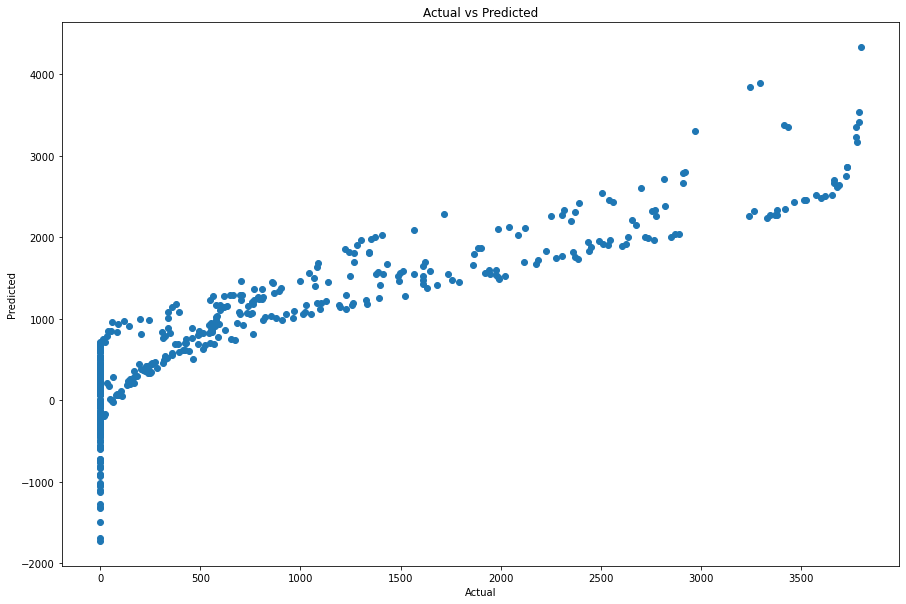

In [163]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Polynomial Regression

### Load the travel insurance dataset

In [227]:
polynomial=pd.read_csv("TravelInsurance_Regression\TravelInsurance_Regr.csv")
polynomial.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56


### One-hot encoding

In [228]:
dummies=pd.get_dummies(polynomial)
dummies

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,Target,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,3616.82,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,3342.88,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,0.00,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,1742.65,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,373.56,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,-224.04,539.91,8.23,-232.93,2,3,12.32,...,1515.56,0,1,0,0,0,0,0,1,0
1496,12.10,2.98,-144.42,-76.05,736.65,0.48,90.41,3,6,7.40,...,1528.48,0,0,1,0,0,0,1,0,0
1497,4.12,4.36,-160.30,-230.43,439.86,0.69,-224.44,3,3,7.02,...,323.67,1,0,0,0,0,0,1,0,0
1498,1.58,13.50,-159.60,-233.85,572.58,0.29,-126.79,1,5,1.68,...,109.19,0,0,0,1,0,0,0,1,0


### Pass all columns except 'Target' to the variable X.

In [229]:
X=dummies.drop(['Target'], axis=1)
X.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,1734.58,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,1672.70,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,1462.86,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,809.46,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,1435.90,0,0,0,1,0,0,0,0,1


### Use the variable y to store the 'Target' value, also known as the target variable that we will be predicting.

In [230]:
y=dummies[['Target']]
y.head()

,Target
0,3616.82
1,3342.88
2,0.00
3,1742.65
4,373.56


### Normalize the dataset

In [231]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.46506133,  0.74184759, -0.84167291,  1.42963378,  0.02896546,
        -0.07631873,  0.88572439, -1.60522276, -1.62629253,  0.13321652,
         0.083995  , -0.3085672 , -0.29732389,  0.41245642, -0.55476064,
         1.63875065, -0.58248237, -0.56195149,  1.99584286, -0.51039612,
        -0.48641902, -0.48956044, -0.51247074],
       [ 0.62854316,  0.74873119, -0.07109323,  1.88087389, -0.25876303,
        -0.08212054,  0.96414008,  0.57331978, -0.52097364, -1.27842626,
        -0.07283524,  0.17435807,  0.00637692,  0.30977495, -0.55476064,
         1.63875065, -0.58248237, -0.56195149, -0.50104145, -0.51039612,
        -0.48641902, -0.48956044,  1.95133091],
       [-0.64697421, -0.92398299, -0.25770753, -0.04491785,  0.29916974,
        -0.08060871,  0.10227606,  0.02868414,  0.03168581,  0.29445311,
         1.11063111,  0.0519729 ,  0.52529877, -0.03842608, -0.55476064,
        -0.61022096,  1.71679015, -0.56195149, -0.50104145,  1.95926253,
        -0.48641902, -0.4895

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### To build the model, import Polynomial Features from the sci-kit learn library

In [233]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
x_poly=poly.fit_transform(x_train)
poly.fit(x_train,y_train)

PolynomialFeatures()

### To fit the polynomial features, we must also use the Linear Regression method.

In [234]:
lin_reg = LinearRegression().fit(x_poly,y_train)

### Examine the coeffiecients and intercept

In [235]:
lin_reg2 = LinearRegression().fit(x_train,y_train)
print ('Coefficients: ', lin_reg2.coef_)
print ('Intercept: ', lin_reg2.intercept_)

Coefficients:  [[ 3.65165244e+02  3.90127690e+02  2.13713401e-01  4.36546088e+02
  -3.86808748e+00  1.05338707e+01 -3.03624135e+02  2.32171032e+02
  -2.46358726e+02  1.67787192e+01 -1.66017560e+01  3.92062350e+00
   2.92012121e+00 -2.66744562e+02 -3.79369719e+15 -3.97649908e+15
  -3.88950568e+15 -3.81941876e+15 -2.43029850e+15 -2.45709024e+15
  -2.38692145e+15 -2.39639532e+15 -2.46293129e+15]]
Intercept:  [911.99816042]


### Let us now apply the predict to our test set.

In [236]:
y_pred=lin_reg.predict(poly.fit_transform(x_test))
y_pred

array([[-8.77109375e+01],
       [ 4.52222656e+02],
       [ 7.04697266e+02],
       [ 1.05529297e+03],
       [ 6.57304688e+01],
       [ 2.19319727e+03],
       [ 2.10742188e+00],
       [ 3.70367188e+02],
       [ 7.46908203e+02],
       [ 3.19585938e+02],
       [ 1.11187500e+02],
       [ 4.78218750e+02],
       [ 2.05883789e+03],
       [ 1.92693359e+03],
       [ 1.43703125e+03],
       [ 1.41244531e+03],
       [-1.42228516e+02],
       [ 2.10677148e+03],
       [ 2.27617188e+02],
       [ 1.39221094e+03],
       [ 3.18250391e+03],
       [ 1.22674219e+03],
       [ 2.92803516e+03],
       [-6.24296875e+01],
       [ 6.94277344e+02],
       [ 5.50541016e+02],
       [ 7.94486328e+02],
       [ 4.69496094e+02],
       [ 1.43433789e+03],
       [ 1.98769531e+01],
       [ 1.89296875e+02],
       [ 5.35341797e+02],
       [ 1.72457812e+03],
       [ 3.02343750e+01],
       [ 2.29655469e+03],
       [ 2.64707031e+01],
       [ 7.51300781e+02],
       [ 9.48292969e+02],
       [ 9.6

### Using the different regression metrics, summarise the model's results.

In [237]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_pred)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))
print('Variance score: %.2f' % lin_reg2.score(x,y))

Mean absolute error: 265.77
Residual sum of squares (MSE): 161513.33
Variance score: -33306966178048137697951744.00


In [238]:
r2_score(y_test,y_pred)

0.8608769821413911

### Plot a graph to see how accurately the claim values are estimated.

Text(0.5, 1.0, 'Actual vs Predicted')

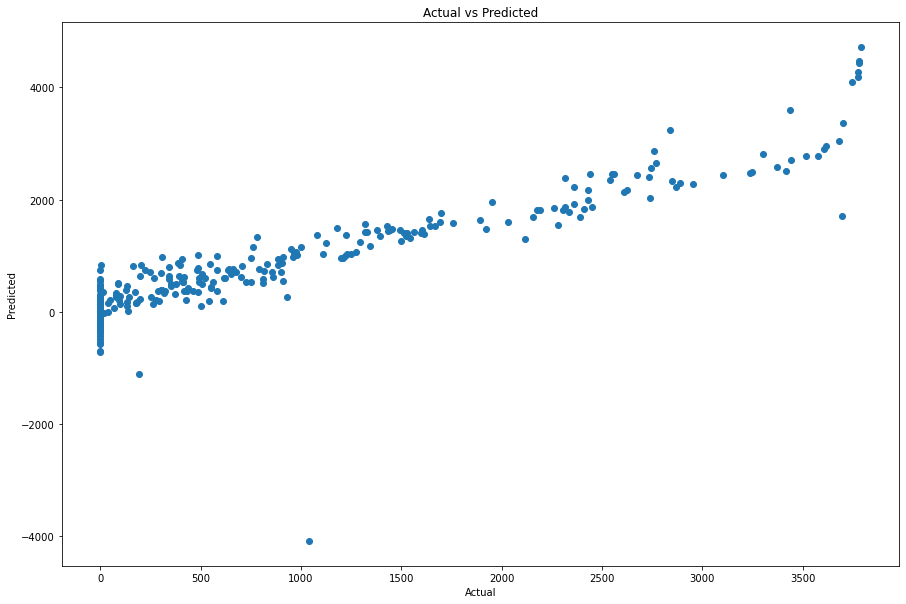

In [176]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Bayesian Regression

### Load the travel insurance dataset

In [295]:
bayesian=pd.read_csv("TravelInsurance_Regression\TravelInsurance_Regr.csv")
bayesian.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56


### One-hot encoding

In [296]:
dummies=pd.get_dummies(bayesian)
dummies

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,Target,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,3616.82,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,3342.88,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,0.00,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,1742.65,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,373.56,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,-224.04,539.91,8.23,-232.93,2,3,12.32,...,1515.56,0,1,0,0,0,0,0,1,0
1496,12.10,2.98,-144.42,-76.05,736.65,0.48,90.41,3,6,7.40,...,1528.48,0,0,1,0,0,0,1,0,0
1497,4.12,4.36,-160.30,-230.43,439.86,0.69,-224.44,3,3,7.02,...,323.67,1,0,0,0,0,0,1,0,0
1498,1.58,13.50,-159.60,-233.85,572.58,0.29,-126.79,1,5,1.68,...,109.19,0,0,0,1,0,0,0,1,0


### Pass all columns except 'Target' to the variable X.

In [297]:
X=dummies.drop(['Target'], axis=1)
X.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,1734.58,0,1,0,0,1,0,0,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,1672.70,0,1,0,0,0,0,0,0,1
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,1462.86,0,0,1,0,0,1,0,0,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,809.46,0,0,1,0,0,1,0,0,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,1435.90,0,0,0,1,0,0,0,0,1


### Use the variable y to store the 'Target' value, also known as the target variable that we will be predicting.

In [298]:
y=dummies[['Target']]
y.head()

,Target
0,3616.82
1,3342.88
2,0.00
3,1742.65
4,373.56


### Standardize the dataset

In [299]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.46506133,  0.74184759, -0.84167291,  1.42963378,  0.02896546,
        -0.07631873,  0.88572439, -1.60522276, -1.62629253,  0.13321652,
         0.083995  , -0.3085672 , -0.29732389,  0.41245642, -0.55476064,
         1.63875065, -0.58248237, -0.56195149,  1.99584286, -0.51039612,
        -0.48641902, -0.48956044, -0.51247074],
       [ 0.62854316,  0.74873119, -0.07109323,  1.88087389, -0.25876303,
        -0.08212054,  0.96414008,  0.57331978, -0.52097364, -1.27842626,
        -0.07283524,  0.17435807,  0.00637692,  0.30977495, -0.55476064,
         1.63875065, -0.58248237, -0.56195149, -0.50104145, -0.51039612,
        -0.48641902, -0.48956044,  1.95133091],
       [-0.64697421, -0.92398299, -0.25770753, -0.04491785,  0.29916974,
        -0.08060871,  0.10227606,  0.02868414,  0.03168581,  0.29445311,
         1.11063111,  0.0519729 ,  0.52529877, -0.03842608, -0.55476064,
        -0.61022096,  1.71679015, -0.56195149, -0.50104145,  1.95926253,
        -0.48641902, -0.4895

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [300]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Examine the coeffiecients and intercept

In [301]:
from sklearn.linear_model import BayesianRidge
clf = linear_model.BayesianRidge().fit(x_train,y_train)
print ('Coefficients: ', ml.coef_)
print ('Intercept: ', ml.intercept_)

Coefficients:  [[ 3.69483752e+02  4.06691276e+02  5.06400227e+00  4.31564623e+02
  -3.85550433e+00  6.75865168e+00 -2.97562566e+02  2.31585442e+02
  -2.40121692e+02  9.55895711e+00 -1.52922932e+01 -8.31642238e+00
  -7.32681649e+00 -2.44240643e+02  9.17386589e+15  9.61591489e+15
   9.40554867e+15  9.23606544e+15  7.58649846e+13  7.67013242e+13
   7.45109127e+13  7.48066521e+13  7.68836604e+13]]
Intercept:  [926.3877295]


C:\Users\danla\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Let us now apply the predict to our test set.

In [302]:
y_pred=clf.predict(x_test)
print(y_pred)

[ 1403.37437375  1333.73795015   923.28379917  1493.80360221
  3296.73478007   536.38350739  -455.87391744   936.45606398
  -125.24339494  1553.79272946   328.56837227   690.59961119
  2637.39090446 -1303.28887987   144.10310431   157.18030108
  -754.71917223  2387.02040551  2692.51799747   579.8273872
  1366.94201923   242.73258549  -847.40387209   405.27055787
 -1830.76043128  -667.04499928   774.0920366   1002.05790527
  2135.48043067  1021.51048686  3433.28955193  2239.43371295
  1233.19537048   546.95962994   372.60315077   923.21699488
  1213.3736299    798.88931297  2550.70502152   181.78740502
 -1107.64934544  -658.1975988   1760.97872555  1503.57093907
  1838.93622501  1172.89359581  1703.08931124  1101.65027313
   119.54161802   445.78801731  1531.95491781  -265.52428895
  1111.72960549  1480.95527059  1660.19428246   267.17544208
  2732.7275198   1185.7612003    307.74654521   592.58989565
  -786.38528931  3179.26157169  1862.62139725    67.81448135
  -228.7549122   1869.909

In [303]:
y_pred=y_pred.reshape(300,1)

### Using the different regression metrics, summarise the model's results.

In [304]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_pred)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_pred) ** 2))
print('Variance score: %.2f' % clf.score(x,y))

Mean absolute error: 387.40
Residual sum of squares (MSE): 253833.84
Variance score: -175222.96


In [305]:
r2_score(y_test,y_pred)

0.7978025682419382

### Plot a graph to see how accurately the claim values are estimated.

Text(0.5, 1.0, 'Actual vs Predicted')

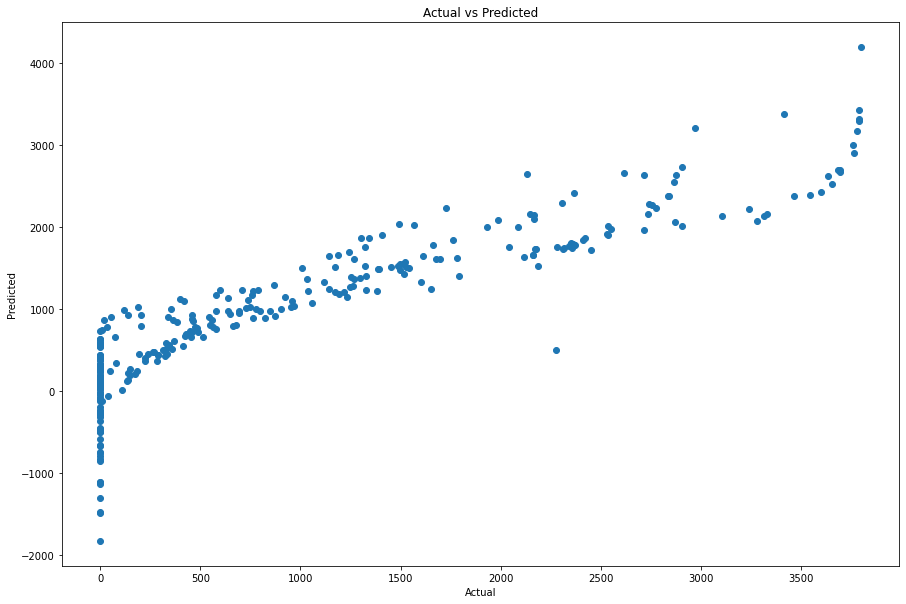

In [306]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Prediction on a hold-out test set (Polynomial Regression)

### Load the travel insurance hold-out test set

In [317]:
pn=pd.read_csv("TravelInsurance_Regression\TravelInsuranceRegr_TestSet.csv")
pn.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,2063.449565
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,2129.015675
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,296.054588
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,1522.624073
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,1328.167374


### One-hot Encoding 

In [318]:
dummies=pd.get_dummies(pn)
dummies

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,Target,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,...,2063.449565,0,0,0,1,0,1,0,0,0
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,...,2129.015675,0,1,0,0,0,0,1,0,0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,...,296.054588,0,1,0,0,0,1,0,0,0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,...,1522.624073,0,0,1,0,1,0,0,0,0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,...,1328.167374,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,-189.33,569.43,0.09,-315.11,2,3,8.64,...,NaN,0,1,0,0,0,0,0,1,0
1496,12.06,14.46,-251.02,-87.90,640.32,3.67,201.37,7,8,9.34,...,NaN,0,1,0,0,0,0,0,0,1
1497,6.54,10.42,-156.28,-221.82,462.30,0.00,-267.50,2,6,5.00,...,NaN,1,0,0,0,0,1,0,0,0
1498,8.06,13.34,-211.82,-483.24,766.38,0.19,140.38,4,6,5.34,...,NaN,0,0,1,0,0,0,1,0,0


### Pass all columns except 'Target' to the variable X.

In [319]:
X=dummies.drop(['Target'], axis=1)
X.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F16,F4_Europe,F4_Rest,F4_UK,F4_USA,F12_High,F12_Low,F12_Medium,F12_Very high,F12_Very low
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,...,1578.68,0,0,0,1,0,1,0,0,0
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,...,1647.02,0,1,0,0,0,0,1,0,0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,...,1449.14,0,1,0,0,0,1,0,0,0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,...,911.98,0,0,1,0,1,0,0,0,0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,...,2251.04,0,1,0,0,0,1,0,0,0


### Use the variable y to store the 'Target' value, also known as the target variable that we will be predicting.¶

In [320]:
y=dummies[['Target']]
y.head()

,Target
0,2063.449565
1,2129.015675
2,296.054588
3,1522.624073
4,1328.167374


### Normalize the dataset

In [321]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 3.64266051e+00, -1.26409555e+00,  1.17277951e+00,
        -6.11796647e-01,  4.72361452e-01, -8.25933642e-02,
         3.20992302e-01, -1.08914967e+00, -1.13093106e+00,
        -1.15664595e+00,  1.32543622e-01, -5.18466182e-01,
         2.75739117e-03,  1.62545515e-01, -5.72218165e-01,
        -5.79403077e-01, -5.70165186e-01,  1.70179432e+00,
        -4.96873015e-01,  1.99170465e+00, -4.82223009e-01,
        -5.06242439e-01, -5.12470743e-01],
       [-4.62402786e-01, -1.77541912e-01,  2.48325344e-01,
        -3.32632140e-02, -1.40294293e+00, -8.23703108e-02,
        -9.36450854e-01, -1.63682801e+00,  2.76499287e+00,
        -9.68842654e-01,  9.08800913e-01,  1.22734876e+00,
         4.36272366e-01,  2.74917714e-01, -5.72218165e-01,
         1.72591420e+00, -5.70165186e-01, -5.87615078e-01,
        -4.96873015e-01, -5.02082475e-01,  2.07372934e+00,
        -5.06242439e-01, -5.12470743e-01],
       [ 2.45518726e+00, -6.24315612e-01, -5.70582227e-01,
         1.80591588e+00,  1.0

### Let us now apply the predict to our test set. Remember that polynomial regression yielded the lowest Mean Square Error

In [322]:
y_pred=lin_reg.predict(poly.fit_transform(x_test))
y_pred

array([[ 1.02762891e+03],
       [ 1.37187305e+03],
       [ 7.33589844e+02],
       [ 1.22814648e+03],
       [ 4.71519141e+03],
       [ 1.27009766e+02],
       [-5.39199219e+02],
       [ 5.11767578e+02],
       [-5.37500000e+01],
       [ 1.63667969e+03],
       [ 2.82279297e+02],
       [ 3.83851562e+02],
       [ 3.16418945e+03],
       [-3.59410156e+02],
       [-6.98144531e+01],
       [ 2.40515625e+02],
       [-4.54443359e+02],
       [ 2.92297266e+03],
       [ 3.53170312e+03],
       [ 2.32546875e+02],
       [ 1.25259180e+03],
       [ 3.23441406e+02],
       [-9.21386719e+01],
       [ 2.32562500e+02],
       [ 1.97248047e+02],
       [-1.46554688e+02],
       [ 7.21089844e+02],
       [ 6.71826172e+02],
       [ 2.80870703e+03],
       [ 5.22121094e+02],
       [ 4.66794531e+03],
       [ 1.89809766e+03],
       [ 1.22185352e+03],
       [ 4.32716797e+02],
       [ 3.43164062e+02],
       [ 6.36076172e+02],
       [ 9.47673828e+02],
       [ 7.00433594e+02],
       [ 3.1

### Prepare the result 

In [324]:
s = pd.DataFrame(y_pred)

### Save the model result to file

In [325]:
s.to_csv("TravelInsurance_Regression\TravelInsuranceRegr_result.csv", index=False)

### Summary of the model performance

In [326]:
result=[{'Mean Absolute Error':396.32,
         'Residual Sum of Squares (MSE)': 251025,
         'R2 Score': 0.79},
        {'Mean Absolute Error':265.77,
         'Residual Sum of Squares (MSE)': 161513.33,
         'R2 Score': 0.86},
        {'Mean Absolute Error': 387.40,
         'Residual Sum of Squares (MSE)': 253833,
         'R2 Score': 0.79}]
       
df=pd.DataFrame(result, index=['Multiple Linear Regression', 'Polynomial Regression','Bayesian Ridge Regression'])
df.head()

,Mean Absolute Error,Residual Sum of Squares (MSE),R2 Score
Multiple Linear Regression,396.32,251025.00,0.79
Polynomial Regression,265.77,161513.33,0.86
Bayesian Ridge Regression,387.40,253833.00,0.79
